In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('../Code/pokemon.csv',index_col='#')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.shape

(800, 12)

A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

            sb.countplot(data = df, x = 'cat_var')

Even though the values of generations in the column look numeric,they're actually just categorical labels indicating when each species was introduced to the series from first generation to seventh generation. 

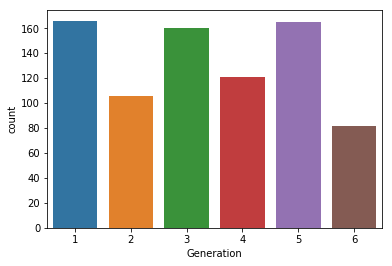

In [5]:
sb.countplot(data=df,x='Generation')

For the example given, you can see that the 1 level has the highest frequency at over 160 counts, followed by 2 and 3, with 6 the least frequent at around 80. By default, each category is given a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. This can be set using the "color" parameter:

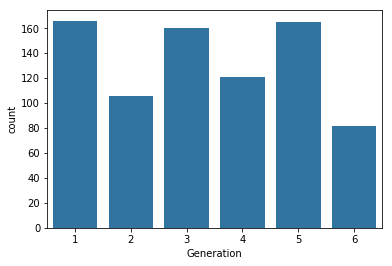

In [8]:
base_color=sb.color_palette()[0]
sb.countplot(data=df,x='Generation',color=base_color)

color_palette returns a list of RGB tuples. Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. Calling this function without any parameters returns the current / default palette, and we take the first color to be the color for all bars.

One thing that we might want to do with a bar chart is to sort the data in some way. For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" paramete

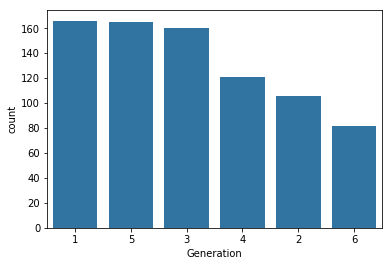

In [9]:
base_color = sb.color_palette()[0]
cat_order = df['Generation'].value_counts().index
sb.countplot(data = df, x = 'Generation', color = base_color, order = cat_order)

For **ordinal-type** data, we probably want to sort the bars **in order of the variables**. While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. The best thing for us to do in this case is to convert the column into **an ordered categorical data type**. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.

In [64]:
pd.__version__

'0.22.0'

**Make an assumption that generation column is ordinal type**

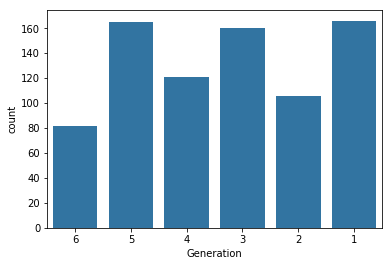

In [10]:
level_order = [6,5,4,3,2,1]
level_orrder=[6,5,4,3,2,1]

# this method requires pandas v0.21 or later
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
df['Generation']=df['Generation'].astype(ordered_cat)

# use this method if you have pandas v0.20.3 or earlier
#df['Generation'] = df['Generation'].astype('category', ordered = True,
#                                     categories = level_order)

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Generation', color = base_color)

Should you find that you need to sort an ordered categorical type in a different order, you can always temporarily override the data type by setting the "order" parameter as above.

# Additional Variations

If you have a lot of category levels, or the category names are long, then you might end up with overcrowding of the tick labels. One way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter "y":

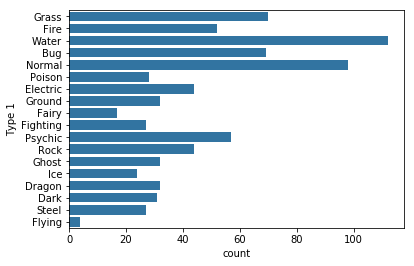

In [11]:
sb.countplot(data=df, y='Type 1',color=sb.color_palette()[0])

Alternatively, you can use matplotlib's xticks function and its "rotation" parameter to change the orientation in which the labels will be depicted (as degrees counter-clockwise from horizontal):

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

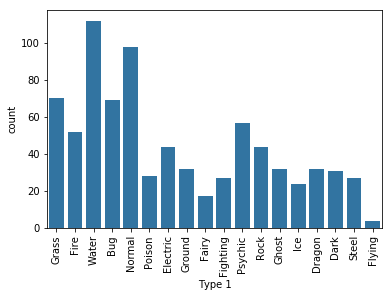

In [12]:
sb.countplot(data=df,x='Type 1',color=sb.color_palette()[0])
plt.xticks(rotation=90)